In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


# Results Day Data

In [ ]:
def format_df(df):
    df = pd.DataFrame(df.groupby('Method').mean()).sort_values('MAE').reset_index()  # reset_index() behält die Spalte „Method“
    df['Improvement MQL (%)'] = 100 * (df.loc[df['Method'] == 'Empirical Quantiles', 'MQL'].values[0] - df['MQL']) / df.loc[df['Method'] == 'Empirical Quantiles', 'MQL'].values[0]
    df['Improvement MAE (%)'] = 100 * (df.loc[df['Method'] == 'Empirical Quantiles', 'MAE'].values[0] - df['MAE']) / df.loc[df['Method'] == 'Empirical Quantiles', 'MAE'].values[0]
    return df


## Results Day Data - Short Time - With Weather Forecast Feature

In [ ]:
day_short_time = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_tagesdaten_short_time.csv')
day_short_time = format_df(day_short_time)
day_short_time

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LSTM,5.0,2.0,1208.274501,2834.141330,61.858563,67.365730
1,LightGBM,5.0,2.0,1201.750327,3070.476361,62.064511,64.644404
2,RandomForest,5.0,2.0,1299.912354,3223.703704,58.965844,62.880038
3,Quantile Regression,5.0,2.0,1910.133772,3289.703187,39.703067,62.120074
4,CatBoost,5.0,2.0,1465.732383,3593.595416,53.731425,58.620848
5,Empirical Quantiles,5.0,2.0,3167.878830,8684.555556,0.000000,0.000000


## Results Day Data - Long Time - With Weather Forecast Feature

In [ ]:
day_long_time = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_tagesdaten_long_time.csv')
day_long_time = format_df(day_long_time)
day_long_time

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LSTM,2.0,7.0,1094.733895,2554.076962,64.122817,69.314985
1,LightGBM,2.0,7.0,1209.631681,3022.489547,60.357327,63.687415
2,Quantile Regression,2.0,7.0,3476.666053,3159.312689,-13.939092,62.043604
3,RandomForest,2.0,7.0,1317.558926,3464.333333,56.820280,58.379046
4,CatBoost,2.0,7.0,1478.931035,3618.103540,51.531710,56.531630
5,Empirical Quantiles,2.0,7.0,3051.337348,8323.531746,0.000000,0.000000


## Results Day Data - Short Time - Without Weather Forecast Feature

In [ ]:
day_short_time_without_weather = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_tagesdaten_WITHOUT_WEATHER_FORECAST_short_time.csv')
day_short_time_without_weather = format_df(day_short_time_without_weather)
day_short_time_without_weather

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LightGBM,5.0,2.0,1087.378146,2677.332925,65.674882,69.171331
1,CatBoost,5.0,2.0,1079.987366,2700.777755,65.908186,68.901371
2,LSTM,5.0,2.0,1216.658046,2749.804498,61.593921,68.336843
3,RandomForest,5.0,2.0,1094.386004,2771.796296,65.453666,68.083614
4,Quantile Regression,5.0,2.0,1910.133772,3252.875772,39.703067,62.544131
5,Empirical Quantiles,5.0,2.0,3167.878830,8684.555556,0.000000,0.000000


## Results Day Data - Long Time - Without Weather Forecast Feature

In [ ]:
day_long_time_without_weather = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_tagesdaten_WITHOUT_WEATHER_FORECAST_long_time.csv')
day_long_time_without_weather = format_df(day_long_time_without_weather)
day_long_time_without_weather

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LightGBM,2.0,7.0,1044.124603,2594.402267,65.781410,68.830512
1,CatBoost,2.0,7.0,1043.200767,2667.561140,65.811687,67.951571
2,LSTM,2.0,7.0,1206.812234,2706.457496,60.449728,67.484265
3,RandomForest,2.0,7.0,1072.001337,2709.746032,64.867820,67.444756
4,Quantile Regression,2.0,7.0,3476.666053,3135.561070,-13.939092,62.328959
5,Empirical Quantiles,2.0,7.0,3051.337348,8323.531746,0.000000,0.000000


In [ ]:
df_day_combined = pd.concat([day_long_time_without_weather, day_short_time_without_weather])

In [ ]:
df_day_combined

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LightGBM,2.0,7.0,1044.124603,2594.402267,65.781410,68.830512
1,CatBoost,2.0,7.0,1043.200767,2667.561140,65.811687,67.951571
2,LSTM,2.0,7.0,1206.812234,2706.457496,60.449728,67.484265
3,RandomForest,2.0,7.0,1072.001337,2709.746032,64.867820,67.444756
4,Quantile Regression,2.0,7.0,3476.666053,3135.561070,-13.939092,62.328959
5,Empirical Quantiles,2.0,7.0,3051.337348,8323.531746,0.000000,0.000000
0,LightGBM,5.0,2.0,1087.378146,2677.332925,65.674882,69.171331
1,CatBoost,5.0,2.0,1079.987366,2700.777755,65.908186,68.901371
2,LSTM,5.0,2.0,1216.658046,2749.804498,61.593921,68.336843
3,RandomForest,5.0,2.0,1094.386004,2771.796296,65.453666,68.083614


In [ ]:
# Überprüfe die Spaltennamen, um sicherzustellen, dass sie korrekt sind
print(df_day_combined.columns)

Index(['Method', 'Test Set', 'Horizon', 'MQL', 'MAE', 'Improvement MQL (%)',
       'Improvement MAE (%)'],
      dtype='object')


## Plot Best Performing Day Data - Without Weather Forecast

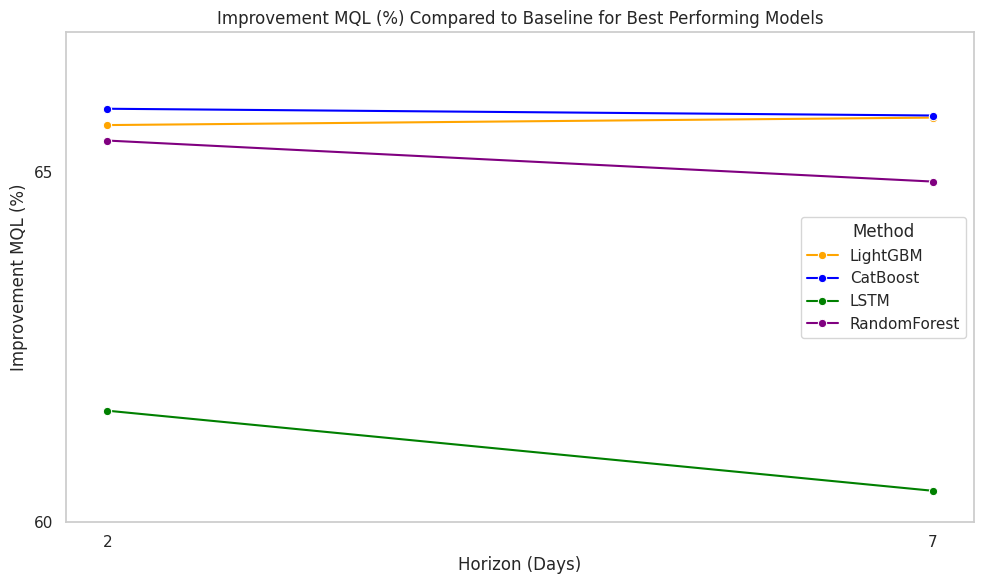

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


# Set the style for seaborn
sns.set(style="whitegrid")

# Correct filtering to include data for both Horizon 2 and 7
df_filtered = df_day_combined[df_day_combined['Horizon'].isin([2.0, 7.0])]

# Define custom colors for each method (adjust as needed)
color_mapping = {
    'CatBoost': 'blue',
    'LSTM': 'green',
    'LightGBM': 'orange',
    'RandomForest': 'purple',
}

# Create the plot
plt.figure(figsize=(10, 6))

# Loop through each unique method and plot lines for Horizon 2 and 7
for method in df_filtered['Method'].unique():
    if method != 'Empirical Quantiles' and method != 'Quantile Regression':
      method_data = df_filtered[df_filtered['Method'] == method]
      sns.lineplot(data=method_data, x="Horizon", y="Improvement MQL (%)", marker="o", label=method, color=color_mapping.get(method, 'black') )

# Customize the plot
plt.xlabel('Horizon (Days)')
plt.ylabel('Improvement MQL (%)')
plt.title('Improvement MQL (%) Compared to Baseline for Best Performing Models')
plt.xticks([2.0, 7.0])  # Set x-axis ticks to only show Horizon 2 and 7

# Set y-axis limits
plt.ylim(60, 67)

# Apply more granular tick intervals between 1000 and 1150
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))  # Fine-grained interval
ax.set_yticks([60, 65])  # Manually set ticks for broader range

# Remove the grid
plt.grid(False)

# Show the plot
plt.legend(title="Method")
# tight layout
plt.tight_layout()
# Save the plot to a file
plt.savefig('/content/drive/My Drive/BA/day_results_without_weather.png')
plt.show()




## Hour Data

## Results Hour Data - Short Time - With Weather Forecast Feature

In [ ]:
hour_short_time = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_stundendaten_short_time.csv')
hour_short_time = format_df(hour_short_time)
hour_short_time

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LSTM,5.0,48.0,73.995873,167.649627,72.810766,76.938623
1,CatBoost,5.0,48.0,69.500687,174.951506,74.462489,75.934198
2,RandomForest,5.0,48.0,77.518984,190.336420,71.516225,73.817896
3,LightGBM,5.0,48.0,76.985292,193.848623,71.712327,73.334768
4,Quantile Regression,5.0,48.0,233.834481,232.424367,14.079257,68.028405
5,Empirical Quantiles,5.0,48.0,272.151373,726.971451,0.000000,0.000000


## Results Hour Data - Long Time - With Weather Forecast Feature

In [ ]:
hour_long_time = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_stundendaten_long_time.csv')
hour_long_time  = format_df(hour_long_time)
hour_long_time

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LSTM,2.0,168.0,74.532941,166.624667,72.565975,77.192845
1,CatBoost,2.0,168.0,68.393482,173.017649,74.825783,76.317791
2,RandomForest,2.0,168.0,75.532156,185.821429,72.198185,74.565242
3,LightGBM,2.0,168.0,75.443058,192.416597,72.230980,73.662513
4,Quantile Regression,2.0,168.0,265.476278,218.806361,2.283707,70.050350
5,Empirical Quantiles,2.0,168.0,271.680668,730.580688,0.000000,0.000000


## Results Hour Data - Short Time - Without Weather Forecast Feature

In [ ]:
hour_short_time_without_weather = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_stundendaten_WITHOUT_WEATHER_FORECAST_short_time.csv')
hour_short_time_without_weather = format_df(hour_short_time_without_weather)
hour_short_time_without_weather

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,LSTM,5.0,48.0,74.748472,167.711314,72.534229,76.930137
1,CatBoost,5.0,48.0,67.022408,167.964595,75.373114,76.895297
2,LightGBM,5.0,48.0,74.545167,188.931273,72.608932,74.011184
3,RandomForest,5.0,48.0,82.567143,198.722994,69.661317,72.664264
4,Quantile Regression,5.0,48.0,233.834481,232.312099,14.079257,68.043848
5,Empirical Quantiles,5.0,48.0,272.151373,726.971451,0.000000,0.000000


## Results Hour Data - Long Time - Without Weather Forecast Feature

In [ ]:
hour_long_time_without_weather = pd.read_csv(f'/content/drive/My Drive/BA/eval_df_stundendaten_WITHOUT_WEATHER_FORECAST_long_time.csv')
hour_long_time_without_weather = format_df(hour_long_time_without_weather)
hour_long_time_without_weather

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,CatBoost,2.0,168.0,64.493495,163.068902,76.261287,77.679549
1,LSTM,2.0,168.0,78.019469,178.303092,71.282657,75.594333
2,LightGBM,2.0,168.0,71.211052,181.526253,73.788694,75.153155
3,RandomForest,2.0,168.0,79.429796,195.433532,70.763545,73.249562
4,Quantile Regression,2.0,168.0,265.476278,218.703062,2.283707,70.064489
5,Empirical Quantiles,2.0,168.0,271.680668,730.580688,0.000000,0.000000


In [ ]:
df_hour_combined = pd.concat([hour_long_time_without_weather, hour_short_time_without_weather])

In [ ]:
df_hour_combined

,Method,Test Set,Horizon,MQL,MAE,Improvement MQL (%),Improvement MAE (%)
0,CatBoost,2.0,168.0,64.493495,163.068902,76.261287,77.679549
1,LSTM,2.0,168.0,78.019469,178.303092,71.282657,75.594333
2,LightGBM,2.0,168.0,71.211052,181.526253,73.788694,75.153155
3,RandomForest,2.0,168.0,79.429796,195.433532,70.763545,73.249562
4,Quantile Regression,2.0,168.0,265.476278,218.703062,2.283707,70.064489
5,Empirical Quantiles,2.0,168.0,271.680668,730.580688,0.000000,0.000000
0,LSTM,5.0,48.0,74.748472,167.711314,72.534229,76.930137
1,CatBoost,5.0,48.0,67.022408,167.964595,75.373114,76.895297
2,LightGBM,5.0,48.0,74.545167,188.931273,72.608932,74.011184
3,RandomForest,5.0,48.0,82.567143,198.722994,69.661317,72.664264


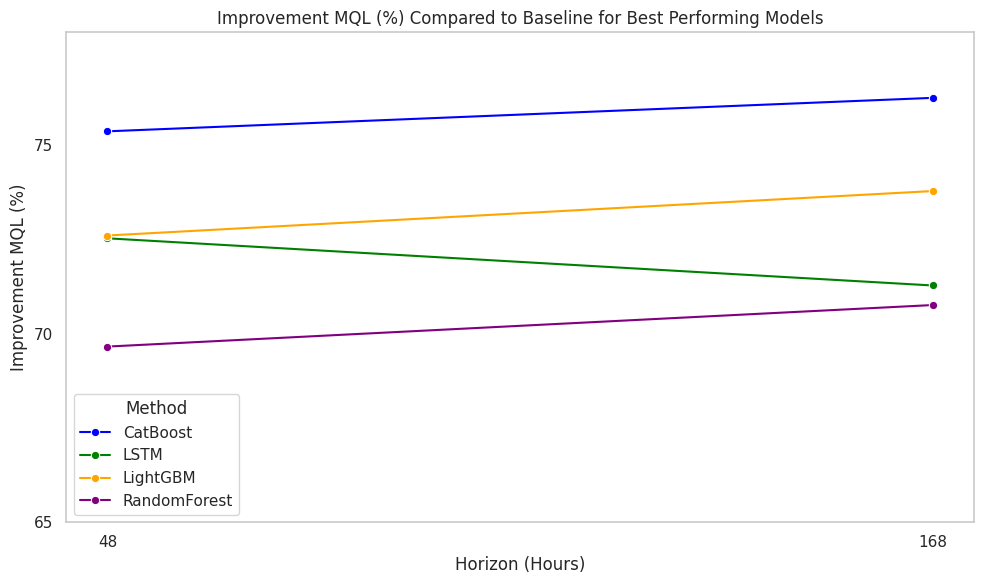

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Correct filtering to include data for both Horizon 48 and 168
df_hour_filtered = df_hour_combined[df_hour_combined['Horizon'].isin([48.0, 168.0])]

# Define custom colors for each method (adjust as needed)
color_mapping = {
    'CatBoost': 'blue',
    'LSTM': 'green',
    'LightGBM': 'orange',
    'RandomForest': 'purple',
}

# Create the plot
plt.figure(figsize=(10, 6))

# Loop through each unique method and plot lines for Horizon 48 and 168
for method in df_hour_filtered['Method'].unique():
    if method != 'Empirical Quantiles' and method != 'Quantile Regression':
        method_data = df_hour_filtered[df_hour_filtered['Method'] == method]
        sns.lineplot(
            data=method_data,
            x="Horizon",
            y="Improvement MQL (%)",
            marker="o",
            label=method,
            color=color_mapping.get(method, 'black')  # Get color from mapping or use black as default
        )

# Customize the plot
plt.xlabel('Horizon (Hours)')
plt.ylabel('Improvement MQL (%)')
plt.title('Improvement MQL (%) Compared to Baseline for Best Performing Models')
plt.xticks([48.0, 168.0])  # Set x-axis ticks to only show Horizon 48 and 168

# Set y-axis limits
plt.ylim(67, 78)

# Apply more granular tick intervals
ax = plt.gca()  # Get the current axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))  # Fine-grained interval
ax.set_yticks([65, 70, 75])  # Manually set ticks for broader range

# Remove the grid
plt.grid(False)

# Show the plot
plt.legend(title="Method")
# Apply tight layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('/content/drive/My Drive/BA/hour_results_without_weather.png')
plt.show()
